In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import video as v
import display as d
import graph as g
import cv2 as cv


In [28]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [29]:
reload(v)
df = v.get_vid_df('videos/black_white_flash.mp4')
df.iloc[0:100]


hue  saturation  value
frame y x                         
0     0 0    50           3    253
        1    50           3    253
        2    50           3    253
        3    50           3    253
        4    50           3    253
...         ...         ...    ...
        95   50           3    253
        96   50           3    253
        97   50           3    253
        98   50           3    253
        99   50           3    253

[100 rows x 3 columns]

In [30]:
df.attrs['width']


100

In [31]:
df.iloc[:5]


hue  saturation  value
frame y x                        
0     0 0   50           3    253
        1   50           3    253
        2   50           3    253
        3   50           3    253
        4   50           3    253

## Test graph function

In [32]:
df.index.levels[0].shape

(300,)

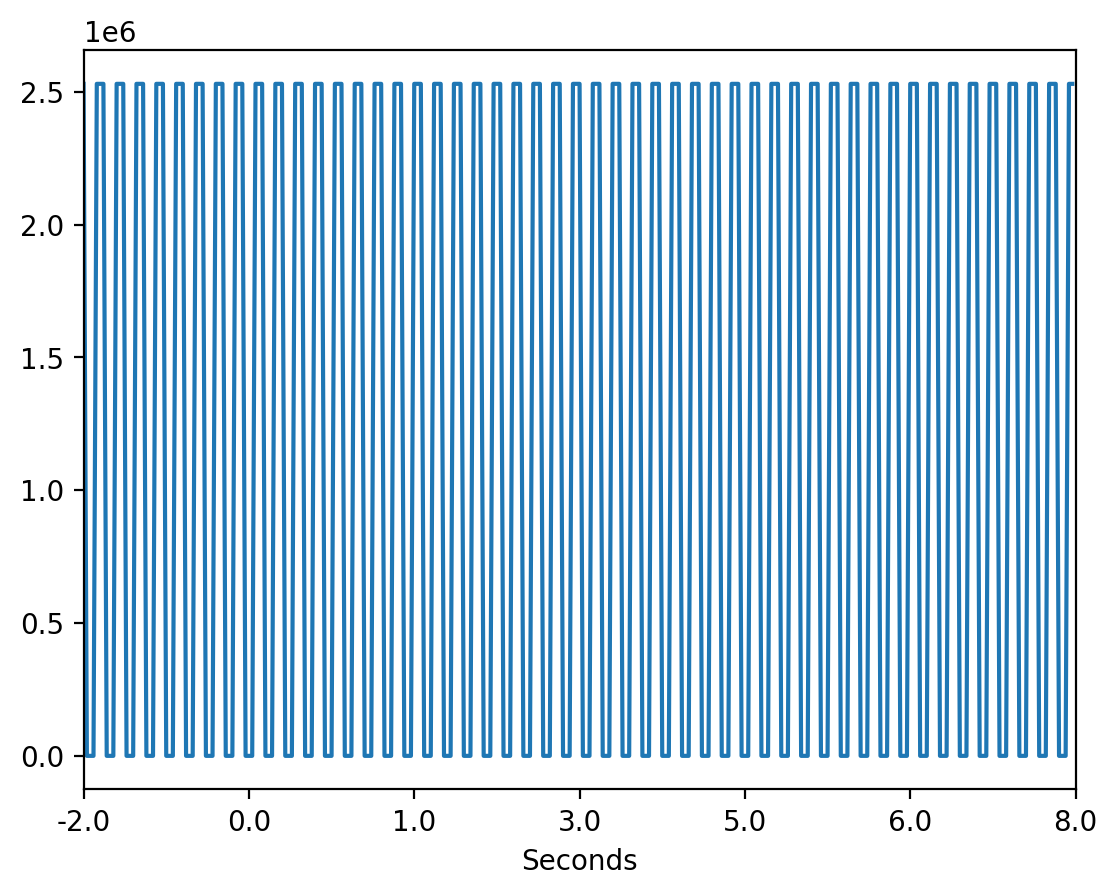

In [33]:
reload(g)
g.graph_frames(df, 'value', lambda gb, key: gb[key].sum())
plt.show()
